<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/sentimientoAcumulado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/matematicas_IA/probabilidad de comprar.xlsx')
df

,salario en miles,Probabilidad
0,6,8.315280e-07
1,7,5.999774e-02
2,8,3.999386e-02
3,9,3.998330e-02
4,10,3.995460e-02
5,11,3.987661e-02
6,12,5.966465e-02
7,13,9.110512e-04
8,14,3.752738e-02
9,15,5.330715e-02


In [3]:
x0 = 20
print(f"1. Valor de x0: {x0}")

1. Valor de x0: 20


 f (x)=1/(1+e\−(x−x0))\\

In [4]:
# Define la variable 'x'
x,x0 = sp.symbols('x x0')

# 2. Definir la función: f(x) = 1/(1+e**-(x-x0))
f_x = 1 / (1 + sp.exp(-(x - x0)))

# Calcular la primera derivada
f_prima = sp.diff(f_x, x)
f_prima

# Evaluar la primera derivada en el punto x0
f_prima_en_x0 = f_prima.subs(x, x0)
f_prima_en_x0

1/4

In [5]:
# Calcular la segunda derivada de f(x) = 1/(1+e**-(x-x0))
segunda_derivada = sp.simplify(sp.diff(f_x, x, 2))
segunda_en_x0 = segunda_derivada.subs(x,x0)

segunda_en_x0

0

In [6]:
# Calcular la segunda derivada de f(x) = 1/(1+e**-(x-x0))
tercera_derivada = sp.simplify(sp.diff(f_x, x, 3))
tercera_en_x0 = tercera_derivada.subs(x,x0)

tercera_en_x0

-1/8

Polinomio de Taylor

In [7]:
a = 20
f_p = f_x + f_prima_en_x0*(x-a) + segunda_en_x0/sp.factorial(2)*(x-a)**2 + tercera_en_x0/sp.factorial(3)*(x-a)**3
taylor = f_x + f_prima*(x-a) + segunda_derivada/sp.factorial(2)*(x-a)**2 + tercera_derivada/sp.factorial(3)*(x-a)**3

# Simplify the taylor expression
taylor = sp.simplify(taylor)

taylor

(3*(1 - exp(x - x0))*(x - 20)**2*(exp(x - x0) + 1) + (x - 20)**3*((exp(x - x0) + 1)**2 - 6*exp(x - x0)) + 6*(x - 20)*(exp(x - x0) + 1)**2 + 6*(exp(x - x0) + 1)**3)*exp(x - x0)/(6*(exp(x - x0) + 1)**4)

Evaluar el polinomio

In [8]:
salarios = list(df['salario en miles'])
p3 = []
for s in salarios:
  #ts = P3_x_simbolico.subs({x: s, x0: a})
  ts = taylor.subs({x: s, x0: a})
  p3.append(ts)

print("Polinomio de taylor evaluado en cada salario:")
print(p3)
df['polinomio'] = pd.DataFrame(p3)
df

Polinomio de taylor evaluado en cada salario:
[(-2828*(exp(-14) + 1)**2 + 16464*exp(-14) + 6*(exp(-14) + 1)**3 + 588*(1 - exp(-14))*(exp(-14) + 1))*exp(-14)/(6*(exp(-14) + 1)**4), (-2275*(exp(-13) + 1)**2 + 13182*exp(-13) + 6*(exp(-13) + 1)**3 + 507*(1 - exp(-13))*(exp(-13) + 1))*exp(-13)/(6*(exp(-13) + 1)**4), (-1800*(exp(-12) + 1)**2 + 10368*exp(-12) + 6*(exp(-12) + 1)**3 + 432*(1 - exp(-12))*(exp(-12) + 1))*exp(-12)/(6*(exp(-12) + 1)**4), (-1397*(exp(-11) + 1)**2 + 7986*exp(-11) + 6*(exp(-11) + 1)**3 + 363*(1 - exp(-11))*(exp(-11) + 1))*exp(-11)/(6*(exp(-11) + 1)**4), (-1060*(exp(-10) + 1)**2 + 6000*exp(-10) + 6*(exp(-10) + 1)**3 + 300*(1 - exp(-10))*(exp(-10) + 1))*exp(-10)/(6*(exp(-10) + 1)**4), (-783*(exp(-9) + 1)**2 + 4374*exp(-9) + 6*(exp(-9) + 1)**3 + 243*(1 - exp(-9))*(exp(-9) + 1))*exp(-9)/(6*(exp(-9) + 1)**4), (-560*(exp(-8) + 1)**2 + 3072*exp(-8) + 6*(exp(-8) + 1)**3 + 192*(1 - exp(-8))*(exp(-8) + 1))*exp(-8)/(6*(exp(-8) + 1)**4), (-385*(exp(-7) + 1)**2 + 2058*exp(-7) + 6*

,salario en miles,Probabilidad,polinomio
0,6,8.315280e-07,(-2828*(exp(-14) + 1)**2 + 16464*exp(-14) + 6*...
1,7,5.999774e-02,(-2275*(exp(-13) + 1)**2 + 13182*exp(-13) + 6*...
2,8,3.999386e-02,(-1800*(exp(-12) + 1)**2 + 10368*exp(-12) + 6*...
3,9,3.998330e-02,(-1397*(exp(-11) + 1)**2 + 7986*exp(-11) + 6*(...
4,10,3.995460e-02,(-1060*(exp(-10) + 1)**2 + 6000*exp(-10) + 6*(...
5,11,3.987661e-02,(-783*(exp(-9) + 1)**2 + 4374*exp(-9) + 6*(exp...
6,12,5.966465e-02,(-560*(exp(-8) + 1)**2 + 3072*exp(-8) + 6*(exp...
7,13,9.110512e-04,(-385*(exp(-7) + 1)**2 + 2058*exp(-7) + 6*(exp...
8,14,3.752738e-02,(-252*(exp(-6) + 1)**2 + 1296*exp(-6) + 6*(exp...
9,15,5.330715e-02,(-155*(exp(-5) + 1)**2 + 750*exp(-5) + 6*(exp(...


In [9]:
# Calcular el error absoluto
error_aprox = np.abs(df['polinomio'] - df['Probabilidad'])
df['error_aproximado'] = pd.DataFrame(error_aprox)
error_aprox


,0
0,8.31528027664132e-7 - (-2828*(exp(-14) + 1)**2...
1,-(-2275*(exp(-13) + 1)**2 + 13182*exp(-13) + 6...
2,-(-1800*(exp(-12) + 1)**2 + 10368*exp(-12) + 6...
3,-(-1397*(exp(-11) + 1)**2 + 7986*exp(-11) + 6*...
4,-(-1060*(exp(-10) + 1)**2 + 6000*exp(-10) + 6*...
5,-(-783*(exp(-9) + 1)**2 + 4374*exp(-9) + 6*(ex...
6,-(-560*(exp(-8) + 1)**2 + 3072*exp(-8) + 6*(ex...
7,0.000911051194400645 - (-385*(exp(-7) + 1)**2 ...
8,0.0375273768433652 - (-252*(exp(-6) + 1)**2 + ...
9,0.0533071490757151 - (-155*(exp(-5) + 1)**2 + ...


In [10]:
df

,salario en miles,Probabilidad,polinomio,error_aproximado
0,6,8.315280e-07,(-2828*(exp(-14) + 1)**2 + 16464*exp(-14) + 6*...,8.31528027664132e-7 - (-2828*(exp(-14) + 1)**2...
1,7,5.999774e-02,(-2275*(exp(-13) + 1)**2 + 13182*exp(-13) + 6*...,-(-2275*(exp(-13) + 1)**2 + 13182*exp(-13) + 6...
2,8,3.999386e-02,(-1800*(exp(-12) + 1)**2 + 10368*exp(-12) + 6*...,-(-1800*(exp(-12) + 1)**2 + 10368*exp(-12) + 6...
3,9,3.998330e-02,(-1397*(exp(-11) + 1)**2 + 7986*exp(-11) + 6*(...,-(-1397*(exp(-11) + 1)**2 + 7986*exp(-11) + 6*...
4,10,3.995460e-02,(-1060*(exp(-10) + 1)**2 + 6000*exp(-10) + 6*(...,-(-1060*(exp(-10) + 1)**2 + 6000*exp(-10) + 6*...
5,11,3.987661e-02,(-783*(exp(-9) + 1)**2 + 4374*exp(-9) + 6*(exp...,-(-783*(exp(-9) + 1)**2 + 4374*exp(-9) + 6*(ex...
6,12,5.966465e-02,(-560*(exp(-8) + 1)**2 + 3072*exp(-8) + 6*(exp...,-(-560*(exp(-8) + 1)**2 + 3072*exp(-8) + 6*(ex...
7,13,9.110512e-04,(-385*(exp(-7) + 1)**2 + 2058*exp(-7) + 6*(exp...,0.000911051194400645 - (-385*(exp(-7) + 1)**2 ...
8,14,3.752738e-02,(-252*(exp(-6) + 1)**2 + 1296*exp(-6) + 6*(exp...,0.0375273768433652 - (-252*(exp(-6) + 1)**2 + ...
9,15,5.330715e-02,(-155*(exp(-5) + 1)**2 + 750*exp(-5) + 6*(exp(...,0.0533071490757151 - (-155*(exp(-5) + 1)**2 + ...


In [11]:
df.to_csv('/content/drive/MyDrive/probabilidad_de_comprar.csv', index=False)
print("DataFrame saved successfully to /content/drive/MyDrive/probabilidad_de_comprar.csv")

DataFrame saved successfully to /content/drive/MyDrive/probabilidad_de_comprar.csv


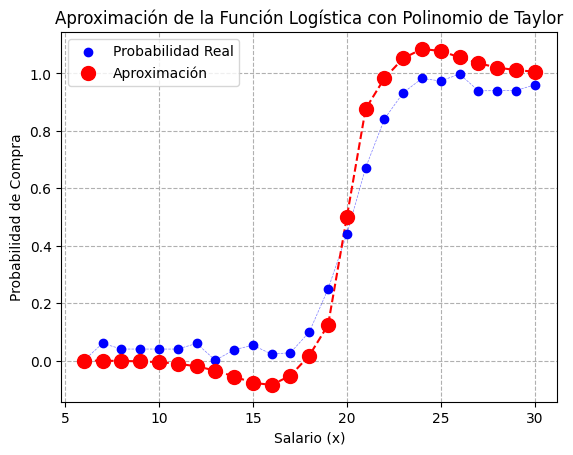

In [12]:
plt.figure()

# Graficar puntos reales
plt.scatter(df['salario en miles'], df['Probabilidad'], color='blue', label='Probabilidad Real', zorder=5)
plt.plot(df['salario en miles'], df['Probabilidad'], color='blue', linestyle='--', linewidth=0.5, alpha=0.5)

# Graficar puntos aproximados
plt.scatter(df['salario en miles'], df['polinomio'], color='red', s=100, label='Aproximación', zorder=5)
plt.plot(df['salario en miles'], df['polinomio'], color='red', linestyle='--', linewidth=1.5)


plt.title('Aproximación de la Función Logística con Polinomio de Taylor')
plt.xlabel('Salario (x)')
plt.ylabel('Probabilidad de Compra')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

In [13]:
import numpy as np
## Defincición de la función
def f(x):
    return 1 / (1 + np.exp(-(x - s0)))

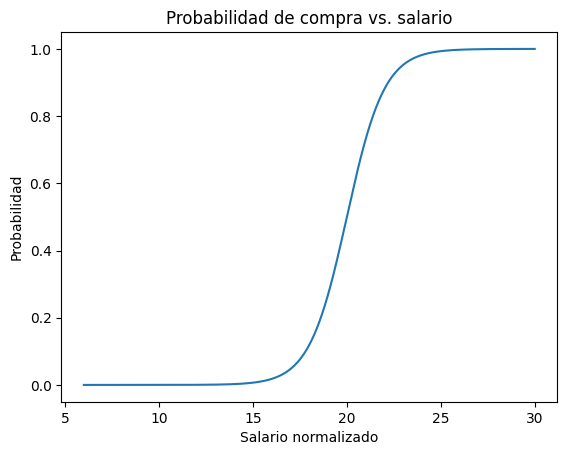

In [14]:
a = df['salario en miles'].min()
b = df['salario en miles'].max()
s0 = 20
N = 1000
x = np.linspace(a, b, N)
plt.plot(x, f(x))
plt.title("Probabilidad de compra vs. salario")
plt.xlabel("Salario normalizado")
plt.ylabel("Probabilidad")
plt.show()

In [15]:
#Definición de la función
def riemann_sum(f, a, b, n, method='left'):
    dx = (b - a) / n
    if method == "left":
        x = np.linspace(a, b-dx, n)
    elif method == "right":
        x = np.linspace(a+dx, b, n)
    else:  # midpoint
        x = np.linspace(a+dx/2, b-dx/2, n)
    return np.sum(f(x) * dx)

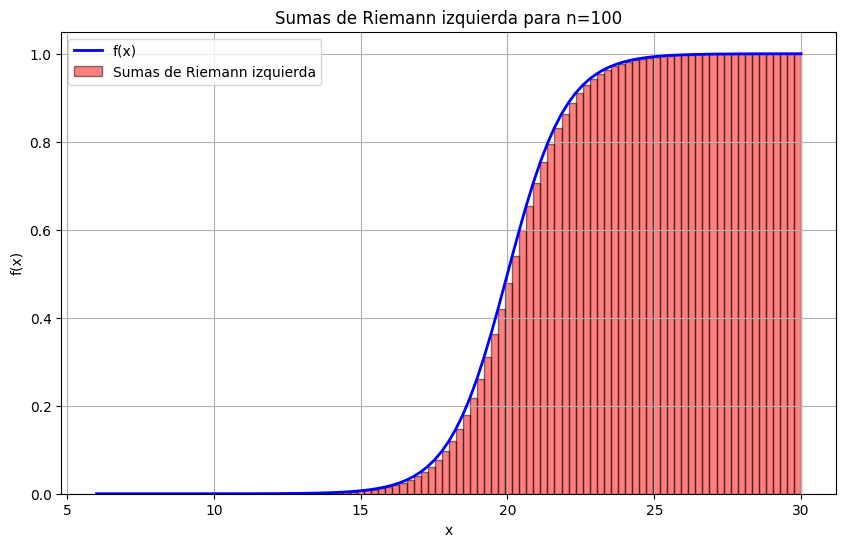

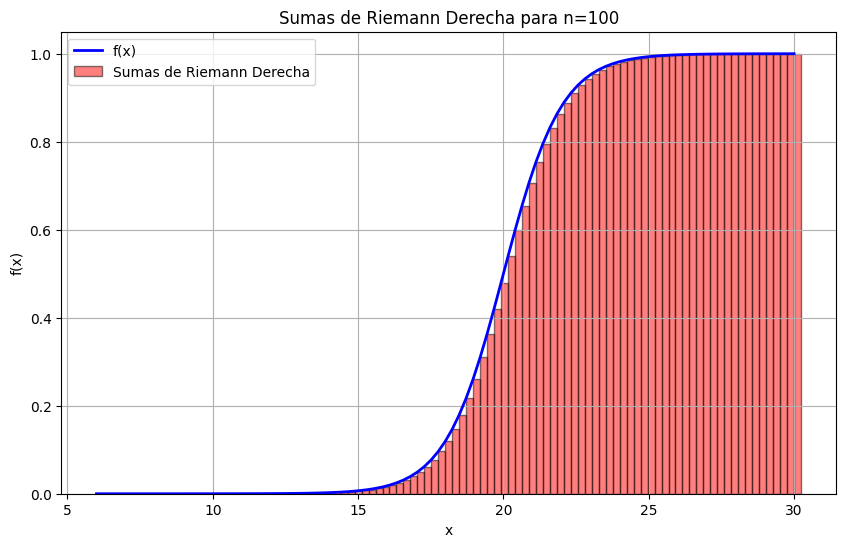

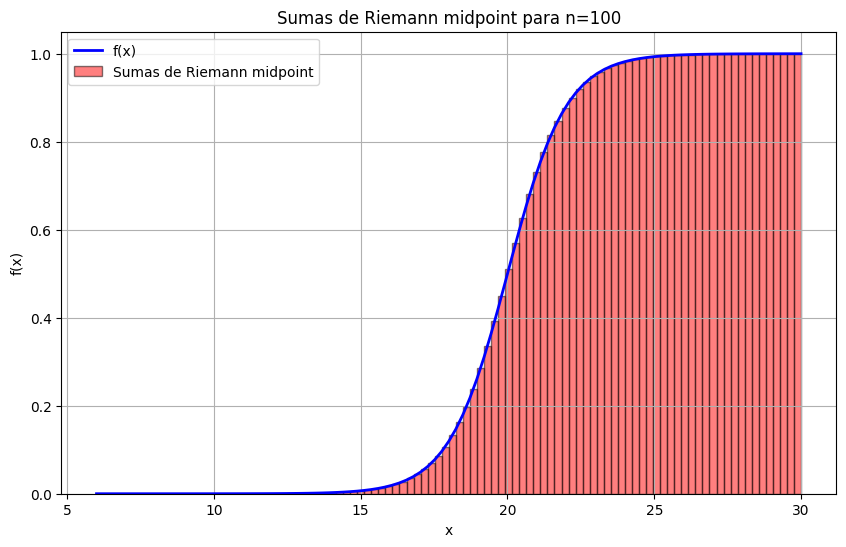

In [16]:
def plot_riemann(f, a, b, n, method='left'):
    dx = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2, label='f(x)')

    if method == 'left':
        x_rect = x[:-1]
        y_rect = y[:-1]
        label = 'Sumas de Riemann izquierda'
    elif method == 'right':
        x_rect = x[1:]
        y_rect = y[1:]
        label = 'Sumas de Riemann Derecha'
    else:  # midpoint
        x_rect = np.linspace(a + dx/2, b - dx/2, n)
        y_rect = f(x_rect)
        label = 'Sumas de Riemann midpoint'
        x_rect = x_rect - dx/2 # Adjust x_rect for plotting with fill_between

    plt.bar(x_rect, y_rect, width=dx, alpha=0.5, align='edge', color='red', edgecolor='black', label=label)


    plt.title(f'{label} para n={n}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_riemann(f, a, b, 100, 'left')
plot_riemann(f, a, b, 100, 'right')
plot_riemann(f, a, b, 100, 'midpoint')

In [17]:
for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann izquierda ≈ {riemann_sum(f, a, b, n,'left'):.4f}")
for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann derecha ≈ {riemann_sum(f, a, b, n,'right'):.4f}")
for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann midpoint ≈ {riemann_sum(f, a, b, n,'other'):.4f}")

n= 10 | Suma de Riemann izquierda ≈ 8.8030
n= 50 | Suma de Riemann izquierda ≈ 9.7601
n=100 | Suma de Riemann izquierda ≈ 9.8801
n=500 | Suma de Riemann izquierda ≈ 9.9760
n= 10 | Suma de Riemann derecha ≈ 11.2029
n= 50 | Suma de Riemann derecha ≈ 10.2400
n=100 | Suma de Riemann derecha ≈ 10.1200
n=500 | Suma de Riemann derecha ≈ 10.0240
n= 10 | Suma de Riemann midpoint ≈ 9.9971
n= 50 | Suma de Riemann midpoint ≈ 10.0000
n=100 | Suma de Riemann midpoint ≈ 10.0000
n=500 | Suma de Riemann midpoint ≈ 10.0000


In [18]:
def trapecios_sum(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return np.sum((f(x[:-1]) + f(x[1:])) / 2 * dx)

for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Trapecios ≈ {trapecios_sum(f, a, b, n):.4f}")

n= 10 | Suma de Trapecios ≈ 10.0030
n= 50 | Suma de Trapecios ≈ 10.0000
n=100 | Suma de Trapecios ≈ 10.0000
n=500 | Suma de Trapecios ≈ 10.0000


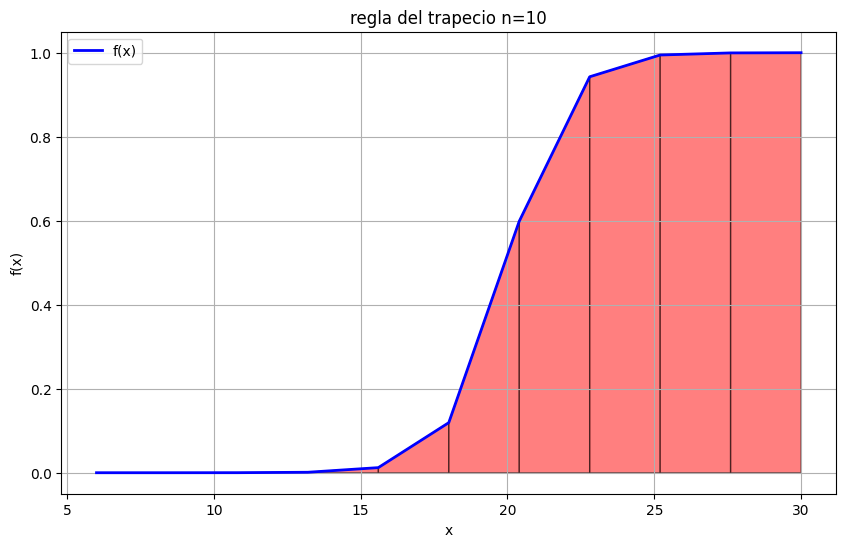

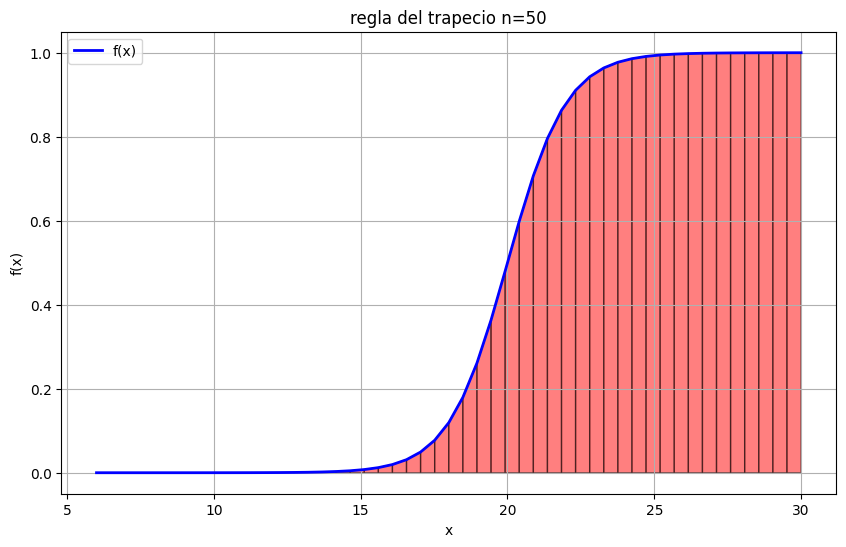

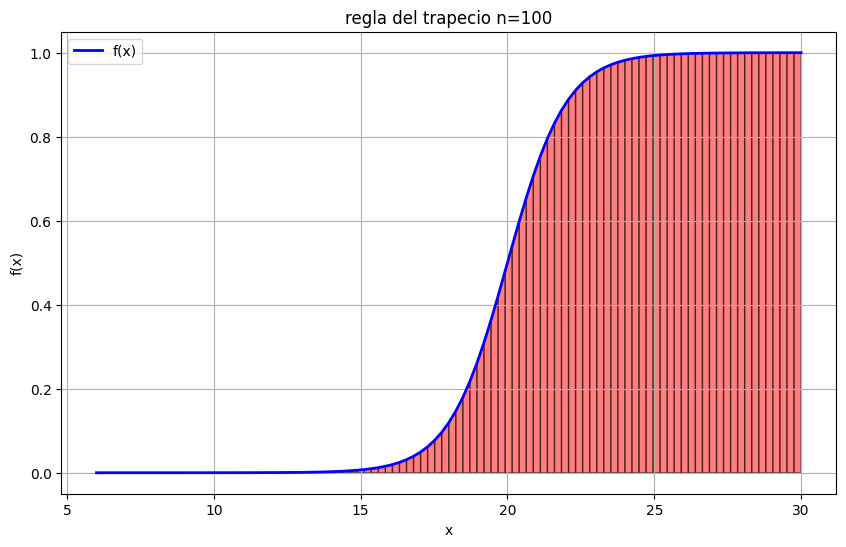

In [19]:
def plot_trapezoids(f, a, b, n):
    dx = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2, label='f(x)')

    for i in range(n):
        x_trap = [x[i], x[i+1], x[i+1], x[i]]
        y_trap = [0, 0, y[i+1], y[i]]
        plt.fill(x_trap, y_trap, 'red', edgecolor='black', alpha=0.5)

    plt.title(f'regla del trapecio n={n}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_trapezoids(f, a, b, 10)
plot_trapezoids(f, a, b, 50)
plot_trapezoids(f, a, b, 100)

In [20]:
from scipy.integrate import quad
exacta, _ = quad(f, a, b)
print("Integral exacta:", exacta)

Integral exacta: 10.000044567370846
